enviroment set up

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118



Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
!git clone <repo_url>
%cd <repo_folder>
!pip install -r requirements.txt


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <repo_url>'
[Errno 2] No such file or directory: '<repo_folder>'
/content
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 60.2 MB/s eta 0:00:00


In [3]:
!pip install -q mediapipe opencv-python

In [4]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

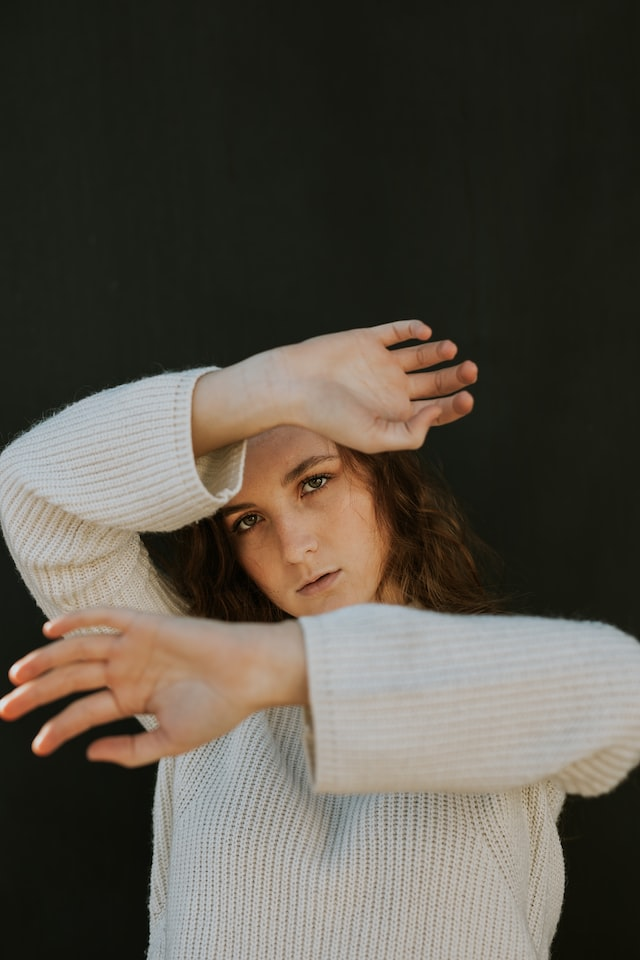

In [6]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

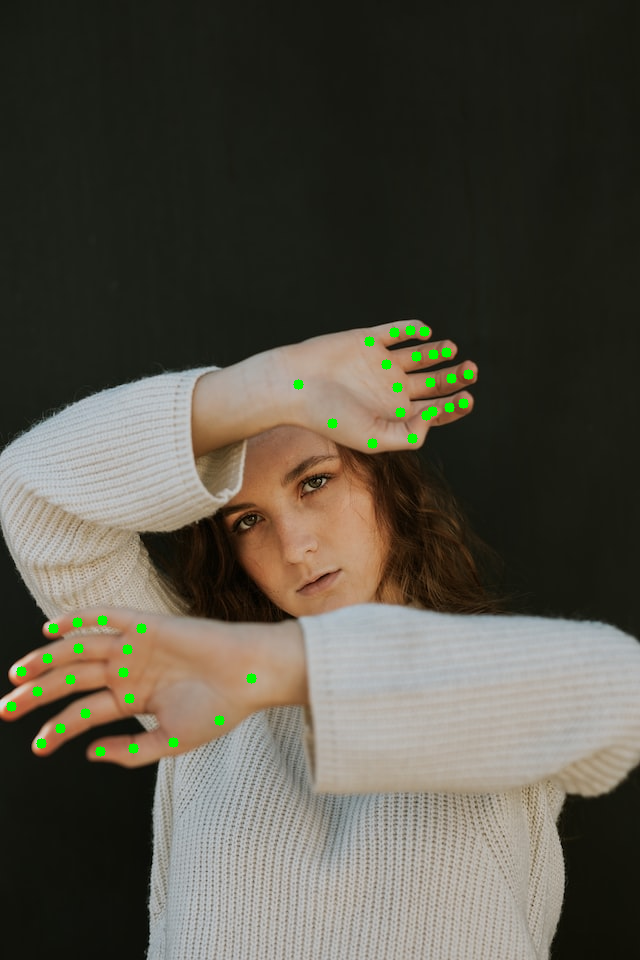

In [7]:
# STEP 1: Import the necessary modules.
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow

# STEP 2: Create a HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')  # Path to the model file
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")  # Replace "image.jpg" with your actual image file

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Define the draw_landmarks_on_image function.
def draw_landmarks_on_image(image_np, detection_result):
    """
    Draws hand landmarks on an image.

    Args:
        image_np: Numpy array representation of the image.
        detection_result: Detection result containing hand landmarks.

    Returns:
        Annotated image with landmarks drawn.
    """
    annotated_image = image_np.copy()
    if detection_result.hand_landmarks:
        for hand_landmarks in detection_result.hand_landmarks:
            # Convert landmarks to a format that can be drawn
            for landmark in hand_landmarks:
                x = int(landmark.x * image_np.shape[1])  # Convert normalized to pixel coordinates
                y = int(landmark.y * image_np.shape[0])
                cv2.circle(annotated_image, (x, y), 5, (0, 255, 0), -1)  # Draw landmarks
    return annotated_image

# STEP 6: Visualize the detection result.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))


Part 1: read the first frame

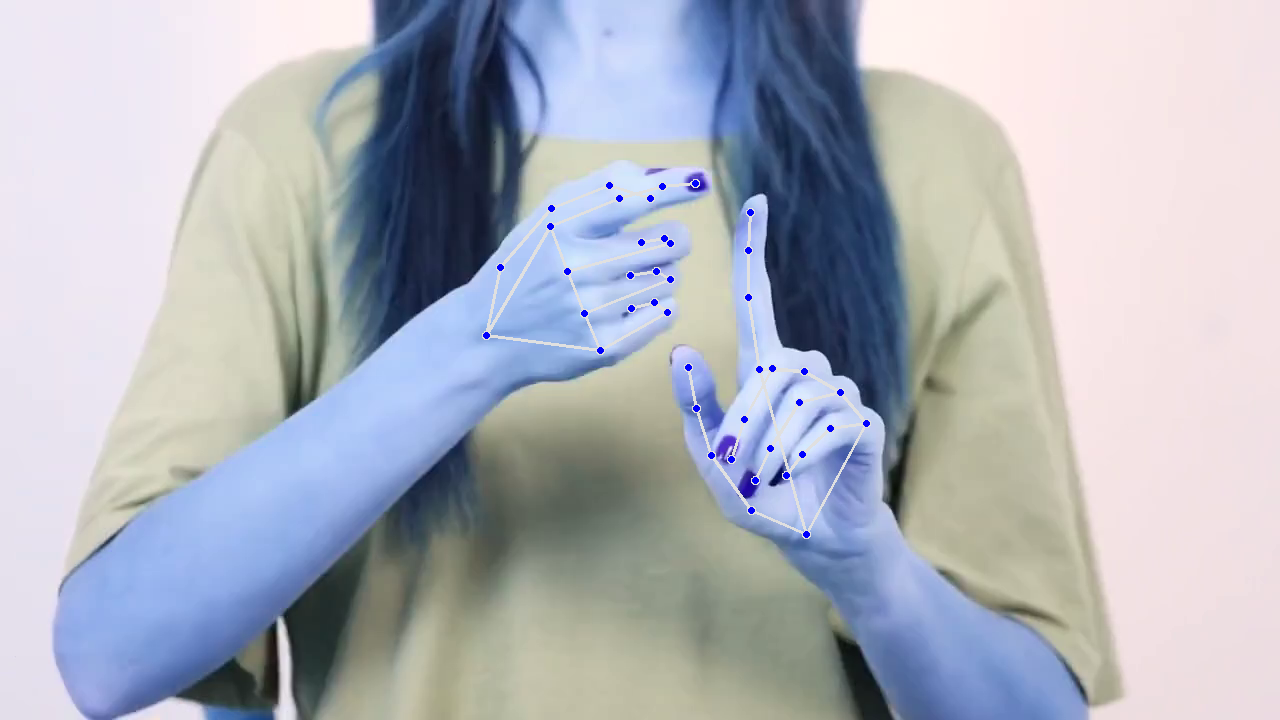

In [8]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Initialize Mediapipe Hand Detector
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Load video or image
video_path = "/content/test.mp4"
cap = cv2.VideoCapture(video_path)

success, frame = cap.read()  # Read the first frame
if success:
    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the image and find hands
    result = hands.process(image_rgb)

    # Draw the hand annotations on the image
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Display the image with hand landmarks
    cv2_imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
else:
    print("Failed to read video.")

cap.release()


Part 2:

In [9]:
!pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ykspufsy
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ykspufsy
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=d7dff654a3c392ce48eedc281285235f87c91ea2157f58b42e9855cd83bd7468
  Stored in directory: /tmp/pip-ephem-wheel-cache-5gci7bb1/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [10]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=192c2f12664c5c5bbab2dab4aa6db87bd0cc13ca37fe2110bfd6e0ad647cf3fd
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [11]:
!pip install torch torchvision torchaudio --upgrade --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [15]:
import cv2
import mediapipe as mp
from segment_anything import SamPredictor, sam_model_registry
import numpy as np

def track_hands_with_masks(input_video_path, output_video_path, sam_checkpoint_path, sam_model_type="vit_b"):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

    try:
        sam = sam_model_registry[sam_model_type](checkpoint=sam_checkpoint_path)
        predictor = SamPredictor(sam)
    except Exception as e:
        print(f"Error loading SAM model: {str(e)}")
        raise

    cap = cv2.VideoCapture(input_video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(image_rgb)

        if result.multi_hand_landmarks:
            predictor.set_image(frame)
            combined_mask = np.zeros((height, width), dtype=bool)

            for hand_landmarks in result.multi_hand_landmarks:
                input_points = np.array([
                    [int(landmark.x * width), int(landmark.y * height)]
                    for landmark in hand_landmarks.landmark
                ])

                masks, scores, _ = predictor.predict(
                    point_coords=input_points,
                    point_labels=np.ones(len(input_points)),
                    multimask_output=True
                )

                if len(scores) > 0:
                    best_mask_idx = np.argmax(scores)
                    combined_mask |= masks[best_mask_idx]

            # Apply mask correctly
            frame[combined_mask] = [0, 255, 0]

        out.write(frame)

    cap.release()
    out.release()
    print(f"Processed video saved to {output_video_path}")

# Example usage
input_video_path = "/content/test.mp4"
output_video_path = "/content/output_with_masks.mp4"
sam_checkpoint_path = "/content/sam_vit_b_01ec64.pth"

track_hands_with_masks(input_video_path,output_video_path,sam_checkpoint_path)

/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Processed video saved to /content/output_with_masks.mp4
